In [46]:
#%pip install wbgapi
#%pip install pandas-datareader
#%pip install statsmodels
%pip install fredapi

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\venv\st3189\scripts\python.exe -m pip install --upgrade pip' command.


In [38]:
import numpy as np
import pandas as pd
import datetime
import wbgapi as wb
from pandas_datareader.data import DataReader
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [50]:
from fredapi import Fred as fred
fred = fred(api_key='xxx')
fred.search('investment').T


series id,RIFLGFCY10NA,RIFLGFCY10XIINA,RIFLGFCY01NA,RIFLGFCY02NA,RIFLGFCY05NA,DGS10,GS10,WGS10YR,RIFLGFCY20NA,RIFLGFCY30NA,...,A889RX1A020NBEA,B3255C0A144NBEA,BOGZ1FA475013033Q,BOGZ1FA684090005Q,AB76RX1Q020SBEA,B839RC1A027NBEA,BOGZ1FA793092305A,BOGZ1FL843081005Q,BOGZ1FA843181105Q,BOGZ1FL263194715Q
id,RIFLGFCY10NA,RIFLGFCY10XIINA,RIFLGFCY01NA,RIFLGFCY02NA,RIFLGFCY05NA,DGS10,GS10,WGS10YR,RIFLGFCY20NA,RIFLGFCY30NA,...,A889RX1A020NBEA,B3255C0A144NBEA,BOGZ1FA475013033Q,BOGZ1FA684090005Q,AB76RX1Q020SBEA,B839RC1A027NBEA,BOGZ1FA793092305A,BOGZ1FL843081005Q,BOGZ1FA843181105Q,BOGZ1FL263194715Q
realtime_start,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,...,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00
realtime_end,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,...,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03 00:00:00
title,Market Yield on U.S. Treasury Securities at 10...,Market Yield on U.S. Treasury Securities at 10...,Market Yield on U.S. Treasury Securities at 1-...,Market Yield on U.S. Treasury Securities at 2-...,Market Yield on U.S. Treasury Securities at 5-...,Market Yield on U.S. Treasury Securities at 10...,Market Yield on U.S. Treasury Securities at 10...,Market Yield on U.S. Treasury Securities at 10...,Market Yield on U.S. Treasury Securities at 20...,Market Yield on U.S. Treasury Securities at 30...,...,Real net government investment,Corporate profits after tax: Domestic industri...,"Credit Unions; Gross Fixed Investment, Nonresi...","Investment Funds; Total Financial Assets, Tran...",Real private fixed investment in new autos and...,Gross government fixed investment: Structures:...,Domestic Financial Sectors; U.S. Direct Invest...,"Monetary Authority, Private Depository Institu...","Monetary Authority, Private Depository Institu...",Rest of the World; Foreign Nonbank Affiliate O...
observation_start,1962-01-01 00:00:00,2003-01-01 00:00:00,1962-01-01 00:00:00,1976-01-01 00:00:00,1962-01-01 00:00:00,1962-01-02 00:00:00,1953-04-01 00:00:00,1962-01-05 00:00:00,1962-01-01 00:00:00,1977-01-01 00:00:00,...,1967-01-01 00:00:00,1929-01-01 00:00:00,1946-10-01 00:00:00,1946-10-01 00:00:00,2007-01-01 00:00:00,1929-01-01 00:00:00,1946-01-01 00:00:00,1945-10-01 00:00:00,1946-10-01 00:00:00,1945-10-01 00:00:00
observation_end,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2025-07-01 00:00:00,2025-06-01 00:00:00,2025-06-27 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,...,2023-01-01 00:00:00,1947-01-01 00:00:00,2025-01-01 00:00:00,2025-01-01 00:00:00,2025-01-01 00:00:00,1997-01-01 00:00:00,2024-01-01 00:00:00,2025-01-01 00:00:00,2025-01-01 00:00:00,2025-01-01 00:00:00
frequency,Annual,Annual,Annual,Annual,Annual,Daily,Monthly,"Weekly, Ending Friday",Annual,Annual,...,Annual,Annual,Quarterly,Quarterly,Quarterly,Annual,Annual,Quarterly,Quarterly,Quarterly
frequency_short,A,A,A,A,A,D,M,W,A,A,...,A,A,Q,Q,Q,A,A,Q,Q,Q
units,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Billions of Chained 2017 Dollars,Millions of Dollars,Millions of Dollars,Millions of Dollars,Billions of Chained 2017 Dollars,Billions of Dollars,Millions of Dollars,Millions of Dollars,Millions of Dollars,Millions of Dollars
units_short,%,%,%,%,%,%,%,%,%,%,...,Bil. of Chn. 2017 $,Mil. of $,Mil. of $,Mil. of $,Bil. of Chn. 2017 $,Bil. of $,Mil. of $,Mil. of $,Mil. of $,Mil. of $


In [23]:
wb.series.metadata.get('NY.GDP.MKTP.KD.ZG')

========
Series: NY.GDP.MKTP.KD.ZG

Aggregationmethod: Weighted average
--------
Dataset: WDI
--------
Developmentrelevance: This indicator is related to the national accounts, which are critical for understanding and managing a country's economy. They provide a framework for the analysis of economic performance. National accounts are the basis for estimating the Gross Domestic Product (GDP) and Gross National Income (GNI), which are the most widely used indicator of economic performance. They are essential for government policymakers, providing the data needed to design and assess fiscal and monetary policies; and are also used by businesses and investors to assess the economic climate and make investment decisions. NAS enable comparison between economies, which is crucial for international trade, investment decisions, and economic competitiveness. More specifically, this indicator is related to national accounts aggregates. Gross Domestic Product (GDP), Gross National Income (GNI), and other aggregates provide a snapshot of the size and health of an economy by measuring the total economic activity within a country. They can thus be used by policymakers to design and implement economic policies, as they reflect the overall economic performance and can indicate the need for intervention in certain areas. Aggregates also allow for comparisons between different economies, which can be useful for trade negotiations, investment decisions, and economic benchmarking. By examining aggregates over time, economists and analysts can identify trends, cycles, and potential areas of concern within an economy, and investors can use national accounts aggregates to assess the potential risks and returns of investing in a particular country. Overall, national accounts aggregates are fundamental tools for economic analysis, policy formulation, and decision-making at both the national and international levels.
--------
IndicatorName: GDP (annual % growth)
--------
License_Type: CC BY-4.0
--------
License_URL: https://creativecommons.org/licenses/by/4.0/
--------
Limitationsandexceptions: Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs.



In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult.



Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation.



Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the s

In [24]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)
gdp_growth.columns

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int64')

In [25]:
# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

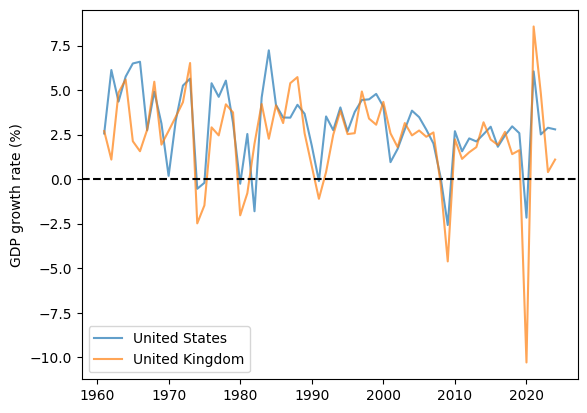

In [26]:
fig, ax = plt.subplots()
ax.plot(gdp_growth.loc['United States'], label='United States', **g_params)
ax.plot(gdp_growth.loc['United Kingdom'], label='United Kingdom', **g_params)
ax.axhline(y=0.0, color='black', linestyle='--')
ax.set_ylabel(ylabel)
ax.legend()
plt.show()

In [33]:
# Get the raw data
start = '1948-01'
end = '2008-01'
us_gnp = DataReader('GNPC96', 'fred', start=start, end=end)
us_gnp_deflator = DataReader('GNPDEF', 'fred', start=start, end=end)
us_monetary_base = DataReader('AMBSL', 'fred', start=start, end=end).resample('QS').mean()
recessions = DataReader('USRECQ', 'fred', start=start, end=end).resample('QS').last().values[:,0]

# Construct the dataframe
dta = pd.concat(map(np.log, (us_gnp, us_gnp_deflator, us_monetary_base)), axis=1)
dta.columns = ['US GNP','US Prices','US monetary base']
dta.index.freq = dta.index.inferred_freq
dates = dta.index._mpl_repr()

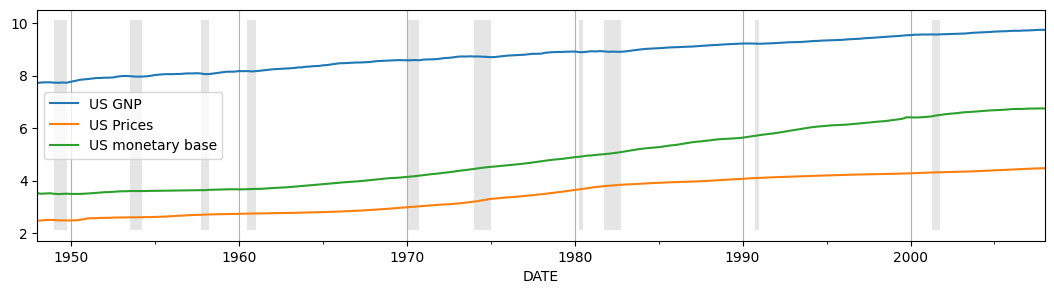

In [39]:
# Plot the data
ax = dta.plot(figsize=(13,3))
ylim = ax.get_ylim()
ax.xaxis.grid()
ax.fill_between(dates, ylim[0]+1e-5, ylim[1]-1e-5, recessions, facecolor='k', alpha=0.1);

In [40]:
# Model specifications

# Unrestricted model, using string specification
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

# Unrestricted model, setting components directly
# This is an equivalent, but less convenient, way to specify a
# local linear trend model with a stochastic damped cycle:
# unrestricted_model = {
#     'irregular': True, 'level': True, 'stochastic_level': True, 'trend': True, 'stochastic_trend': True,
#     'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

# The restricted model forces a smooth trend
restricted_model = {
    'level': 'smooth trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

# Restricted model, setting components directly
# This is an equivalent, but less convenient, way to specify a
# smooth trend model with a stochastic damped cycle. Notice
# that the difference from the local linear trend model is that
# `stochastic_level=False` here.
# unrestricted_model = {
#     'irregular': True, 'level': True, 'stochastic_level': False, 'trend': True, 'stochastic_trend': True,
#     'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

In [41]:
# Output
output_mod = sm.tsa.UnobservedComponents(dta['US GNP'], **unrestricted_model)
output_res = output_mod.fit(method='powell', disp=False)

# Prices
prices_mod = sm.tsa.UnobservedComponents(dta['US Prices'], **unrestricted_model)
prices_res = prices_mod.fit(method='powell', disp=False)

prices_restricted_mod = sm.tsa.UnobservedComponents(dta['US Prices'], **restricted_model)
prices_restricted_res = prices_restricted_mod.fit(method='powell', disp=False)

# Money
money_mod = sm.tsa.UnobservedComponents(dta['US monetary base'], **unrestricted_model)
money_res = money_mod.fit(method='powell', disp=False)

money_restricted_mod = sm.tsa.UnobservedComponents(dta['US monetary base'], **restricted_model)
money_restricted_res = money_restricted_mod.fit(method='powell', disp=False)

In [42]:
print(output_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                        US GNP   No. Observations:                  241
Model:                    local linear trend   Log Likelihood                 769.972
                   + damped stochastic cycle   AIC                          -1527.945
Date:                       Wed, 02 Jul 2025   BIC                          -1507.137
Time:                               21:12:53   HQIC                         -1519.558
Sample:                           01-01-1948                                         
                                - 01-01-2008                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.398e-06   7.35e-06      0.190      0

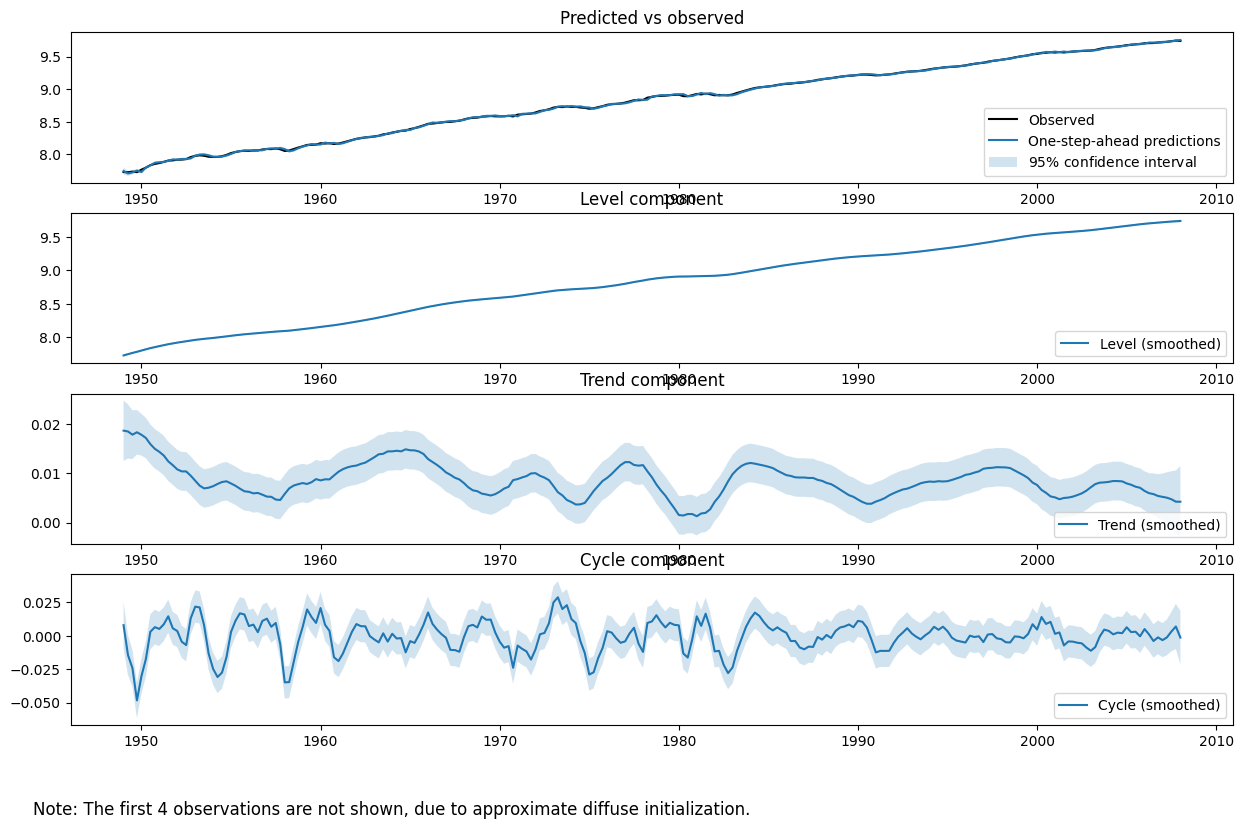

In [43]:
fig = output_res.plot_components(legend_loc='lower right', figsize=(15, 9));

In [45]:
# Create Table I
table_i = np.zeros((5,6))

start = dta.index[0]
end = dta.index[-1]
time_range = '%d:%d-%d:%d' % (start.year, start.quarter, end.year, end.quarter)
models = [
    ('US GNP', time_range, 'None'),
    ('US Prices', time_range, 'None'),
    ('US Prices', time_range, r'$\sigma_\eta^2 = 0$'),
    ('US monetary base', time_range, 'None'),
    ('US monetary base', time_range, r'$\sigma_\eta^2 = 0$'),
]
index = pd.MultiIndex.from_tuples(models, names=['Series', 'Time range', 'Restrictions'])
parameter_symbols = [
    r'$\sigma_\zeta^2$', r'$\sigma_\eta^2$', r'$\sigma_\kappa^2$', r'$\rho$',
    r'$2 \pi / \lambda_c$', r'$\sigma_\varepsilon^2$',
]

i = 0
for res in (output_res, prices_res, prices_restricted_res, money_res, money_restricted_res):
    if res.model.stochastic_level:
        (sigma_irregular, sigma_level, sigma_trend,
         sigma_cycle, frequency_cycle, damping_cycle) = res.params
    else:
        (sigma_irregular, sigma_level,
         sigma_cycle, frequency_cycle, damping_cycle) = res.params
        sigma_trend = np.nan
    period_cycle = 2 * np.pi / frequency_cycle

    table_i[i, :] = [
        sigma_level*1e7, sigma_trend*1e7,
        sigma_cycle*1e7, damping_cycle, period_cycle,
        sigma_irregular*1e7
    ]
    i += 1

pd.set_option('float_format', lambda x: '%.4g' % np.round(x, 2) if not np.isnan(x) else '-')
table_i = pd.DataFrame(table_i, index=index, columns=parameter_symbols)
table_i

$\sigma_\zeta^2$  \
Series           Time range    Restrictions                            
US GNP           1948:1-2008:1 None                            27.77   
US Prices        1948:1-2008:1 None                                0   
                               $\sigma_\eta^2 = 0$             61.91   
US monetary base 1948:1-2008:1 None                            69.41   
                               $\sigma_\eta^2 = 0$             18.83   

                                                    $\sigma_\eta^2$  \
Series           Time range    Restrictions                           
US GNP           1948:1-2008:1 None                           31.99   
US Prices        1948:1-2008:1 None                           61.89   
                               $\sigma_\eta^2 = 0$              NaN   
US monetary base 1948:1-2008:1 None                           18.77   
                               $\sigma_\eta^2 = 0$              NaN   

                                                    $\sigma_\kappa^2$  $\rho$  \
Series           Time range    Restrictions                                     
US GNP           1948:1-2008:1 None                             387.2    0.87   
US Prices        1948:1-2008:1 None                              20.7    0.43   
                               $\sigma_\eta^2 = 0$               20.7    0.43   
US monetary base 1948:1-2008:1 None                             192.6    0.89   
                               $\sigma_\eta^2 = 0$              247.9    0.89   

                                                    $2 \pi / \lambda_c$  \
Series           Time range    Restrictions                               
US GNP           1948:1-2008:1 None                               13.98   
US Prices        1948:1-2008:1 None                                6.55   
                               $\sigma_\eta^2 = 0$                 6.55   
US monetary base 1948:1-2008:1 None                               23.25   
                               $\sigma_\eta^2 = 0$                23.92   

                                                    $\sigma_\varepsilon^2$  
Series           Time range    Restrictions                                 
US GNP           1948:1-2008:1 None                                  13.98  
US Prices        1948:1-2008:1 None                                      0  
                               $\sigma_\eta^2 = 0$                       0  
US monetary base 1948:1-2008:1 None                                      0  
                               $\sigma_\eta^2 = 0$                       0